In [2]:
import pandas as pd
from os.path import isfile, join
from os import listdir
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scp

In [3]:
datafiles = [join('.\\data', f) for f in listdir('./data') if join('./data', f).endswith(".csv")]

In [4]:
datafiles

['.\\data\\Guess_2020_part0_2025-05-14_17h56.07.624.csv',
 '.\\data\\Guess_2020_part1_part2_2025-05-14_18h17.02.827.csv',
 '.\\data\\Guess_2020_sm_2025-05-14_18h51.28.478.csv',
 '.\\data\\Guess_2345_part0_2025-05-12_12h52.06.678.csv',
 '.\\data\\Guess_2345_part1_part2_2025-05-12_13h19.59.945.csv',
 '.\\data\\Guess_2345_sm_2025-05-12_13h58.25.708.csv',
 '.\\data\\Guess_3415_part0_2025-05-07_18h06.43.880.csv',
 '.\\data\\Guess_3415_part1_part2_2025-05-07_18h18.40.789.csv',
 '.\\data\\Guess_3415_sm_2025-05-07_19h02.04.177.csv',
 '.\\data\\Guess_4626_part1_part2_2025-05-21_18h10.12.067.csv',
 '.\\data\\Guess_4626_sm_2025-05-21_18h49.54.569.csv',
 '.\\data\\Guess_5579_part0_2025-05-10_12h20.15.733.csv',
 '.\\data\\Guess_5579_part1_part2_2025-05-10_12h33.23.619.csv',
 '.\\data\\Guess_5579_sm_2025-05-10_13h11.39.088.csv',
 '.\\data\\Guess_7328_part0_2025-05-10_14h29.28.579.csv',
 '.\\data\\Guess_7328_part1_part2_2025-05-10_14h40.36.507.csv',
 '.\\data\\Guess_7328_sm_2025-05-10_15h12.32.724.cs

In [5]:
counter = 0
frames = []
IDs = []
for f in datafiles:
    
    if "recall_selection.keys" in pd.read_csv(f):
        df = pd.read_csv(f, converters={'PID': str})
        IDs.append(df["PID"][0])
        frames.append(df)
        counter += 1
print('Number of finished experiments', counter)

Number of finished experiments 10


In [6]:
# trial_type : Guess or Read
# guess_reached.keys : how many guesses (fgh) 0-1-More
# recall_reached.keys : do they recall or not (fg) No - Yes
# recall_selection.key : which letter they chose (just added saving which is which)
# recall_selection.rt : check how long it takes for them generally to select
# living_nonliving.keys : (fg) living/nonliving
# living_nonliving.rt

In [7]:
all_trials = pd.concat(frames,  ignore_index = True).filter(["PID", "Alter", "Geschlecht", "date", "cue", "target", "list_item", 
                                      "trial_type", "guess_reached.keys", "guess_reached.rt",
                                       "test_trials.thisIndex",
                                      "recall_reached.keys", "recall_reached.rt",
                                       "recall_selection.keys", "recall_selection.rt", "correct_choice"])
all_trials["recalled"] = (all_trials["recall_reached.keys"] == 3)
all_trials["corr_recalled"] = (all_trials["correct_choice"] == 1)
all_trials.loc[all_trials["PID"]=="pilot1", "recalled"] = (all_trials["recall_reached.keys"] == 2)

In [8]:
recall = all_trials.loc[all_trials["test_trials.thisIndex"] >= 0]
recall

,PID,date,cue,target,trial_type,guess_reached.keys,guess_reached.rt,test_trials.thisIndex,recall_reached.keys,recall_reached.rt,recall_selection.keys,recall_selection.rt,correct_choice,recalled,corr_recalled
99,2020,2025-05-14_18h17.02.827,NaN,NaN,Read,NaN,NaN,0.0,2.0,1.952642,NaN,NaN,0.0,False,False
100,2020,2025-05-14_18h17.02.827,NaN,NaN,Guess,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,False,False
101,2020,2025-05-14_18h17.02.827,NaN,NaN,Read,NaN,NaN,0.0,3.0,2.629036,4.0,2.552643,1.0,True,True
102,2020,2025-05-14_18h17.02.827,NaN,NaN,Guess,NaN,NaN,0.0,3.0,1.857837,NaN,NaN,0.0,True,False
103,2020,2025-05-14_18h17.02.827,NaN,NaN,Guess,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,BP002,2025-05-21_11h24.07.966,NaN,NaN,Read,NaN,NaN,0.0,3.0,1.514798,5.0,1.337011,1.0,True,True
1755,BP002,2025-05-21_11h24.07.966,NaN,NaN,Guess,NaN,NaN,0.0,3.0,1.387821,2.0,0.895921,1.0,True,True
1756,BP002,2025-05-21_11h24.07.966,NaN,NaN,Guess,NaN,NaN,0.0,3.0,1.583243,4.0,1.244391,1.0,True,True
1757,BP002,2025-05-21_11h24.07.966,NaN,NaN,Guess,NaN,NaN,0.0,3.0,2.377249,5.0,1.385033,1.0,True,True


<Axes: xlabel='guess_reached.keys', ylabel='guess_reached.rt'>

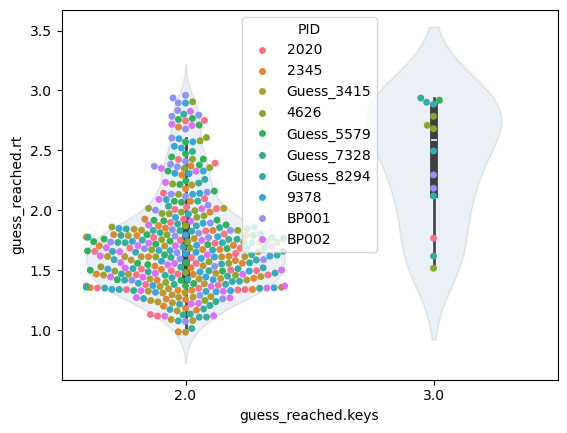

In [9]:
sns.violinplot(data = all_trials, x="guess_reached.keys", y = "guess_reached.rt", alpha=0.1)
sns.swarmplot(data = all_trials, x="guess_reached.keys", y = "guess_reached.rt", hue="PID")

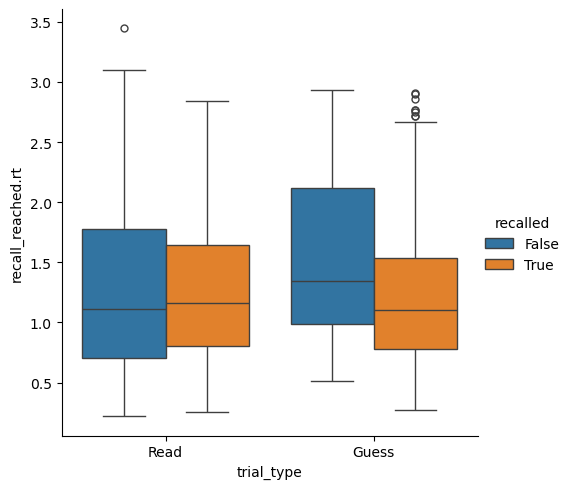

In [10]:
sns.catplot(data = recall, hue = "recalled", kind="box", x="trial_type", y = "recall_reached.rt")

<Axes: xlabel='trial_type', ylabel='recall_reached.rt'>

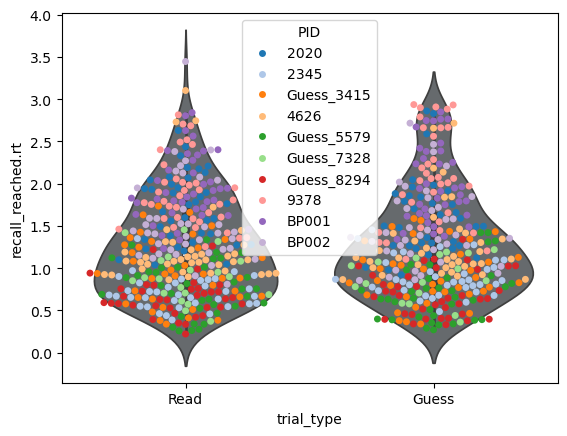

In [11]:
sns.violinplot(data = recall, x="trial_type", y = "recall_reached.rt", saturation=0.05)
sns.swarmplot(data = recall, x="trial_type", y = "recall_reached.rt", hue="PID", palette='tab20')

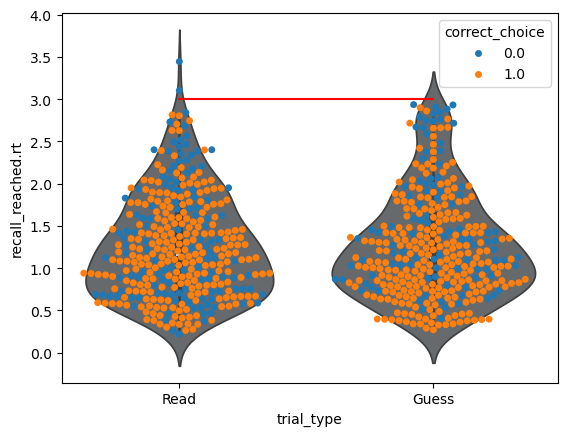

In [12]:
sns.violinplot(data = recall, x="trial_type", y = "recall_reached.rt", saturation=0.05)
sns.swarmplot(data = recall, x="trial_type", y = "recall_reached.rt", hue="correct_choice")
plt.plot([0,1], [3,3], color='r')

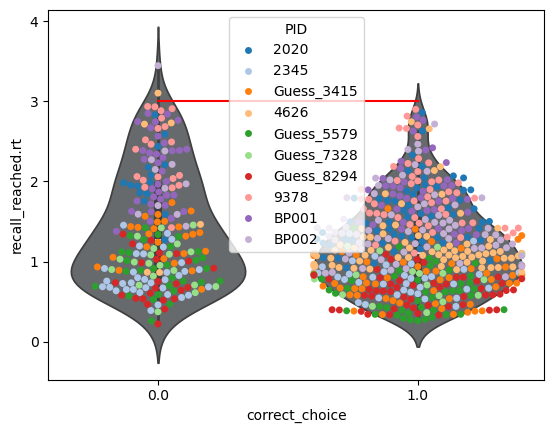

In [13]:
sns.violinplot(data = recall, x="correct_choice", y = "recall_reached.rt", saturation=0.05)
sns.swarmplot(data = recall, x="correct_choice", y = "recall_reached.rt", hue="PID", palette='tab20')
plt.plot([0,1], [3,3], color='r')

<Axes: xlabel='trial_type', ylabel='recall_selection.rt'>

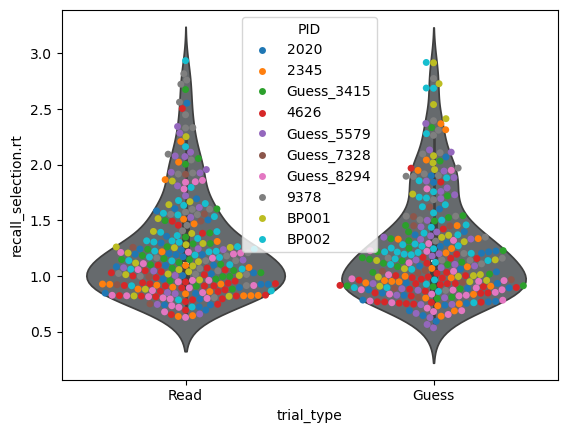

In [14]:
sns.violinplot(data = recall, x="trial_type", y = "recall_selection.rt", saturation=0.05)
sns.swarmplot(data = recall, x="trial_type", y = "recall_selection.rt", hue="PID")

C:\Users\LocalAdmin\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='corr_recalled', ylabel='recall_selection.rt'>

C:\Users\LocalAdmin\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 17.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


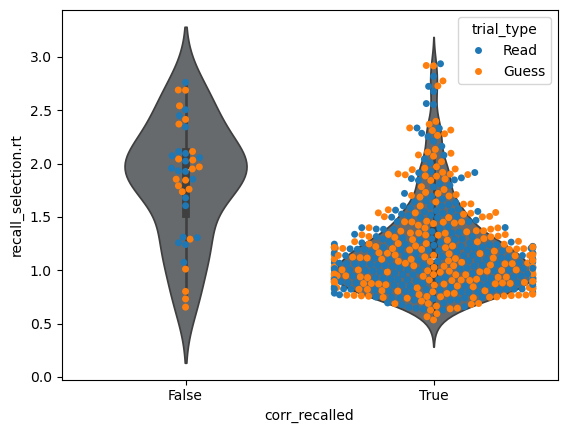

In [15]:
sns.violinplot(data = recall, x="corr_recalled", y = "recall_selection.rt", saturation=0.05)
sns.swarmplot(data = recall, x="corr_recalled", y = "recall_selection.rt", hue="trial_type")

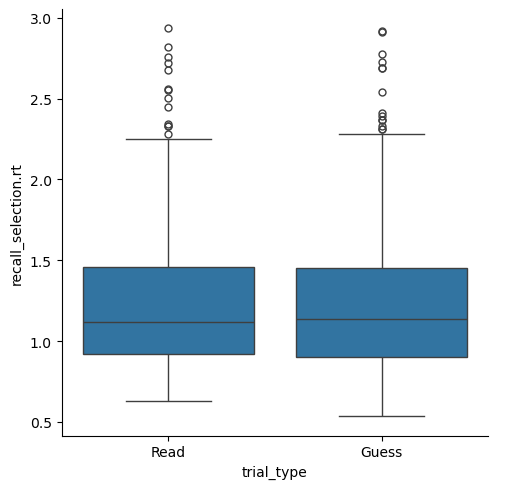

In [16]:
sns.catplot(data = recall,  x="trial_type", y = "recall_selection.rt", kind='box')

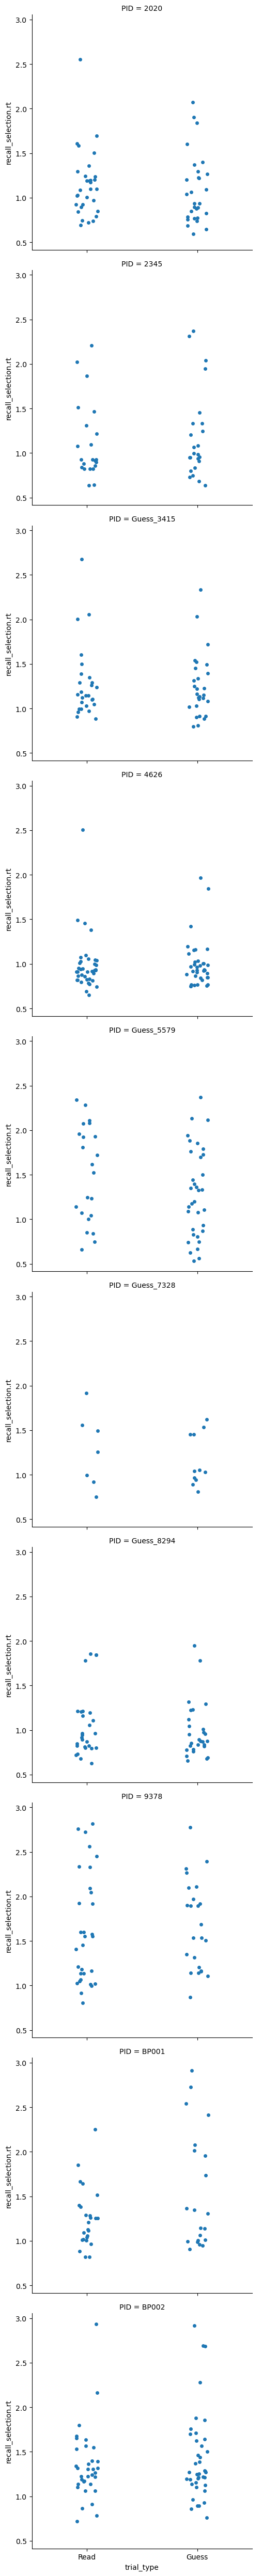

In [17]:
# Note: participant 879824 did not use the numeric keys, but the actual letter keys to select the last letter
sns.catplot(data = recall,  x="trial_type", y = "recall_selection.rt", row="PID")

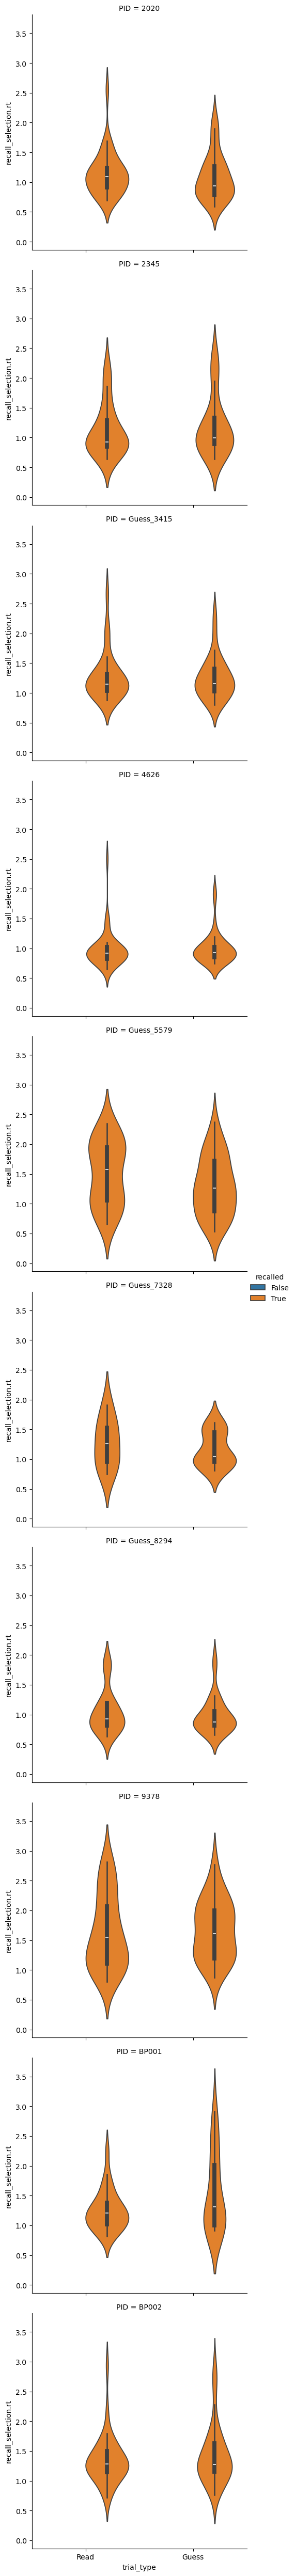

In [18]:
sns.catplot(data = recall, hue = "recalled", kind="violin", x="trial_type", y = "recall_selection.rt", row="PID")

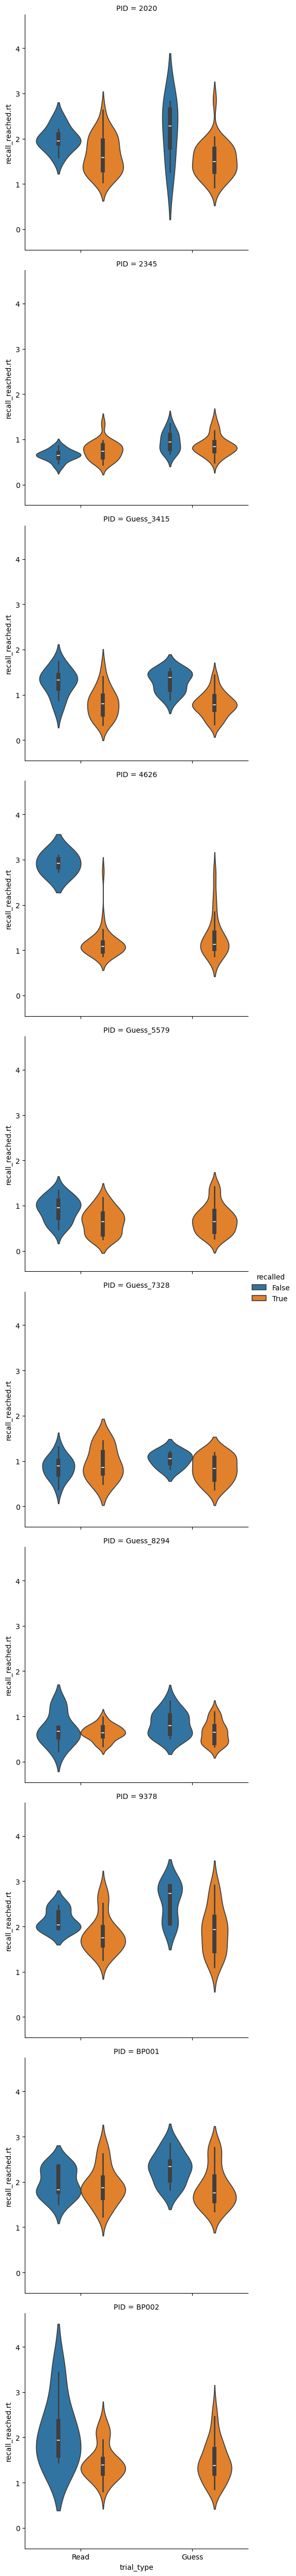

In [19]:
sns.catplot(data = recall, hue = "recalled", kind="violin", x="trial_type", y = "recall_reached.rt", row="PID")

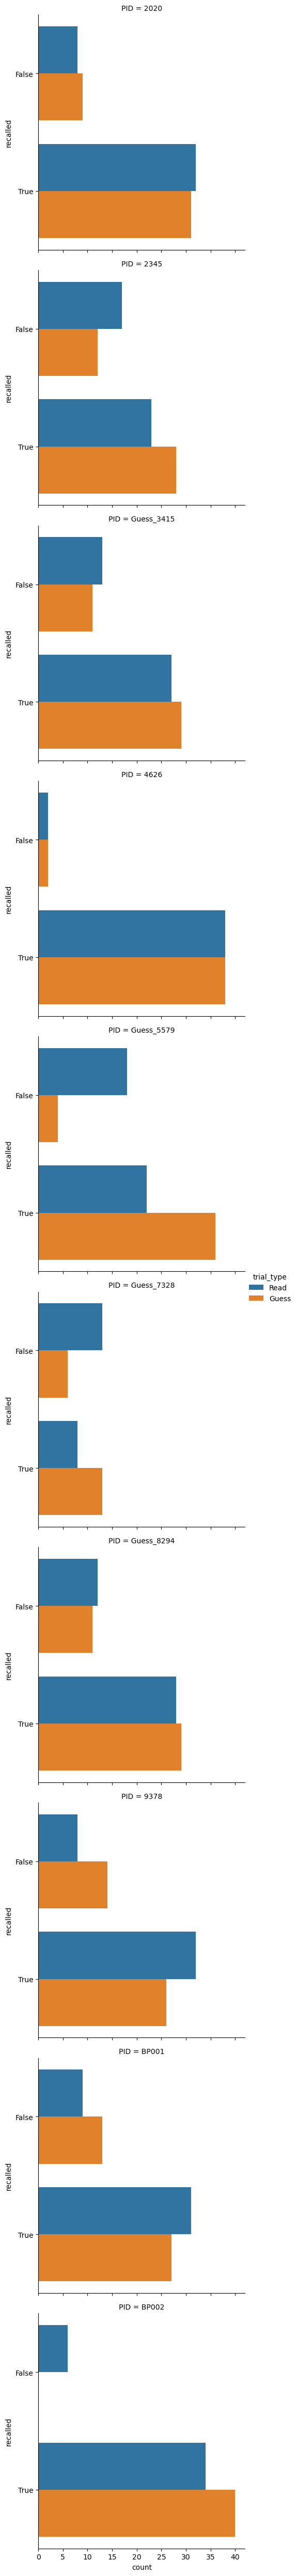

In [20]:
sns.catplot(data = recall, y = "recalled", kind="count", hue="trial_type", row='PID')

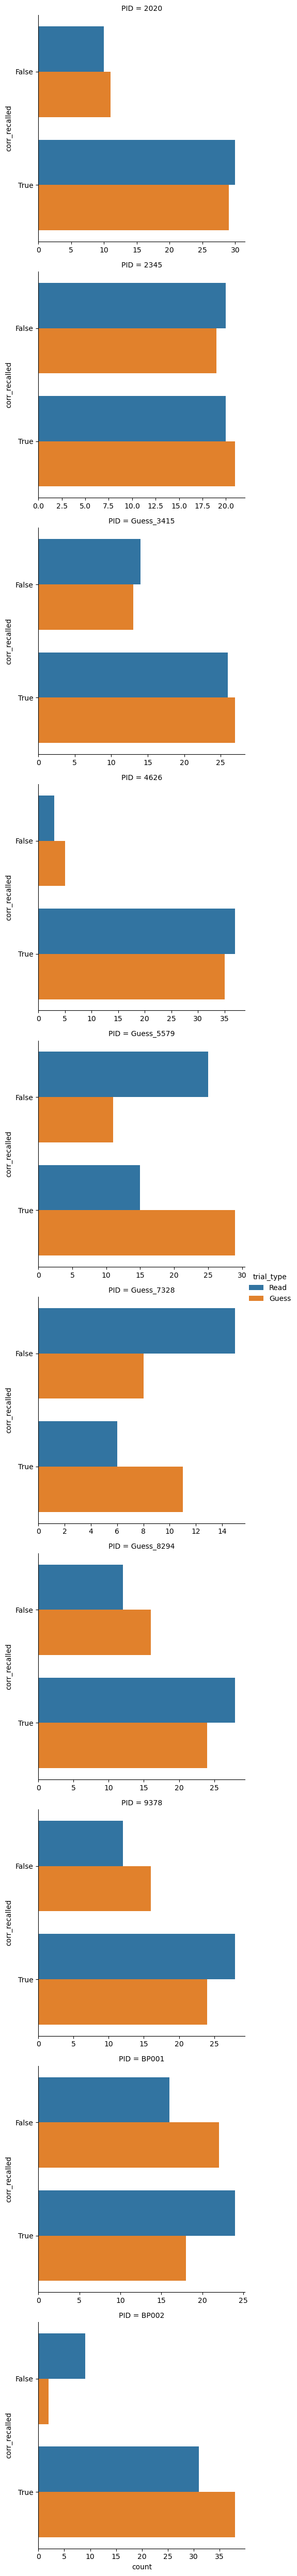

In [25]:
sns.catplot(data = recall, y = "corr_recalled", kind="count", hue="trial_type", row='PID', sharex=False)

In [22]:
recall_sum = pd.crosstab(index=recall['PID'], columns = [recall['trial_type'], recall['recalled']], normalize='index')
recall_sum

trial_type   Guess            Read        
recalled     False   True    False   True 
PID                                       
2020        0.1125  0.3875  0.1000  0.4000
2345        0.1500  0.3500  0.2125  0.2875
4626        0.0250  0.4750  0.0250  0.4750
9378        0.1750  0.3250  0.1000  0.4000
BP001       0.1625  0.3375  0.1125  0.3875
BP002       0.0000  0.5000  0.0750  0.4250
Guess_3415  0.1375  0.3625  0.1625  0.3375
Guess_5579  0.0500  0.4500  0.2250  0.2750
Guess_7328  0.1500  0.3250  0.3250  0.2000
Guess_8294  0.1375  0.3625  0.1500  0.3500

In [23]:
scp.ttest_rel(recall_sum['Guess'][True], recall_sum['Read'][True])

TtestResult(statistic=1.3848683239837127, pvalue=0.19945593307444665, df=9)

In [24]:
corr_recall_sum = pd.crosstab(index=recall['PID'], columns = [recall['trial_type'], recall['corr_recalled']], normalize='index')
corr_recall_sum = corr_recall_sum.loc[[False, True, False, False, True, True, True, True, True, True, True]]
corr_recall_sum

IndexError: Boolean index has wrong length: 11 instead of 10

In [ ]:
scp.ttest_rel(corr_recall_sum['Guess'][True], corr_recall_sum['Read'][True])